## Identifying Emerging Research Trends in Artificial Intelligence: A Topic Modeling Using NMF

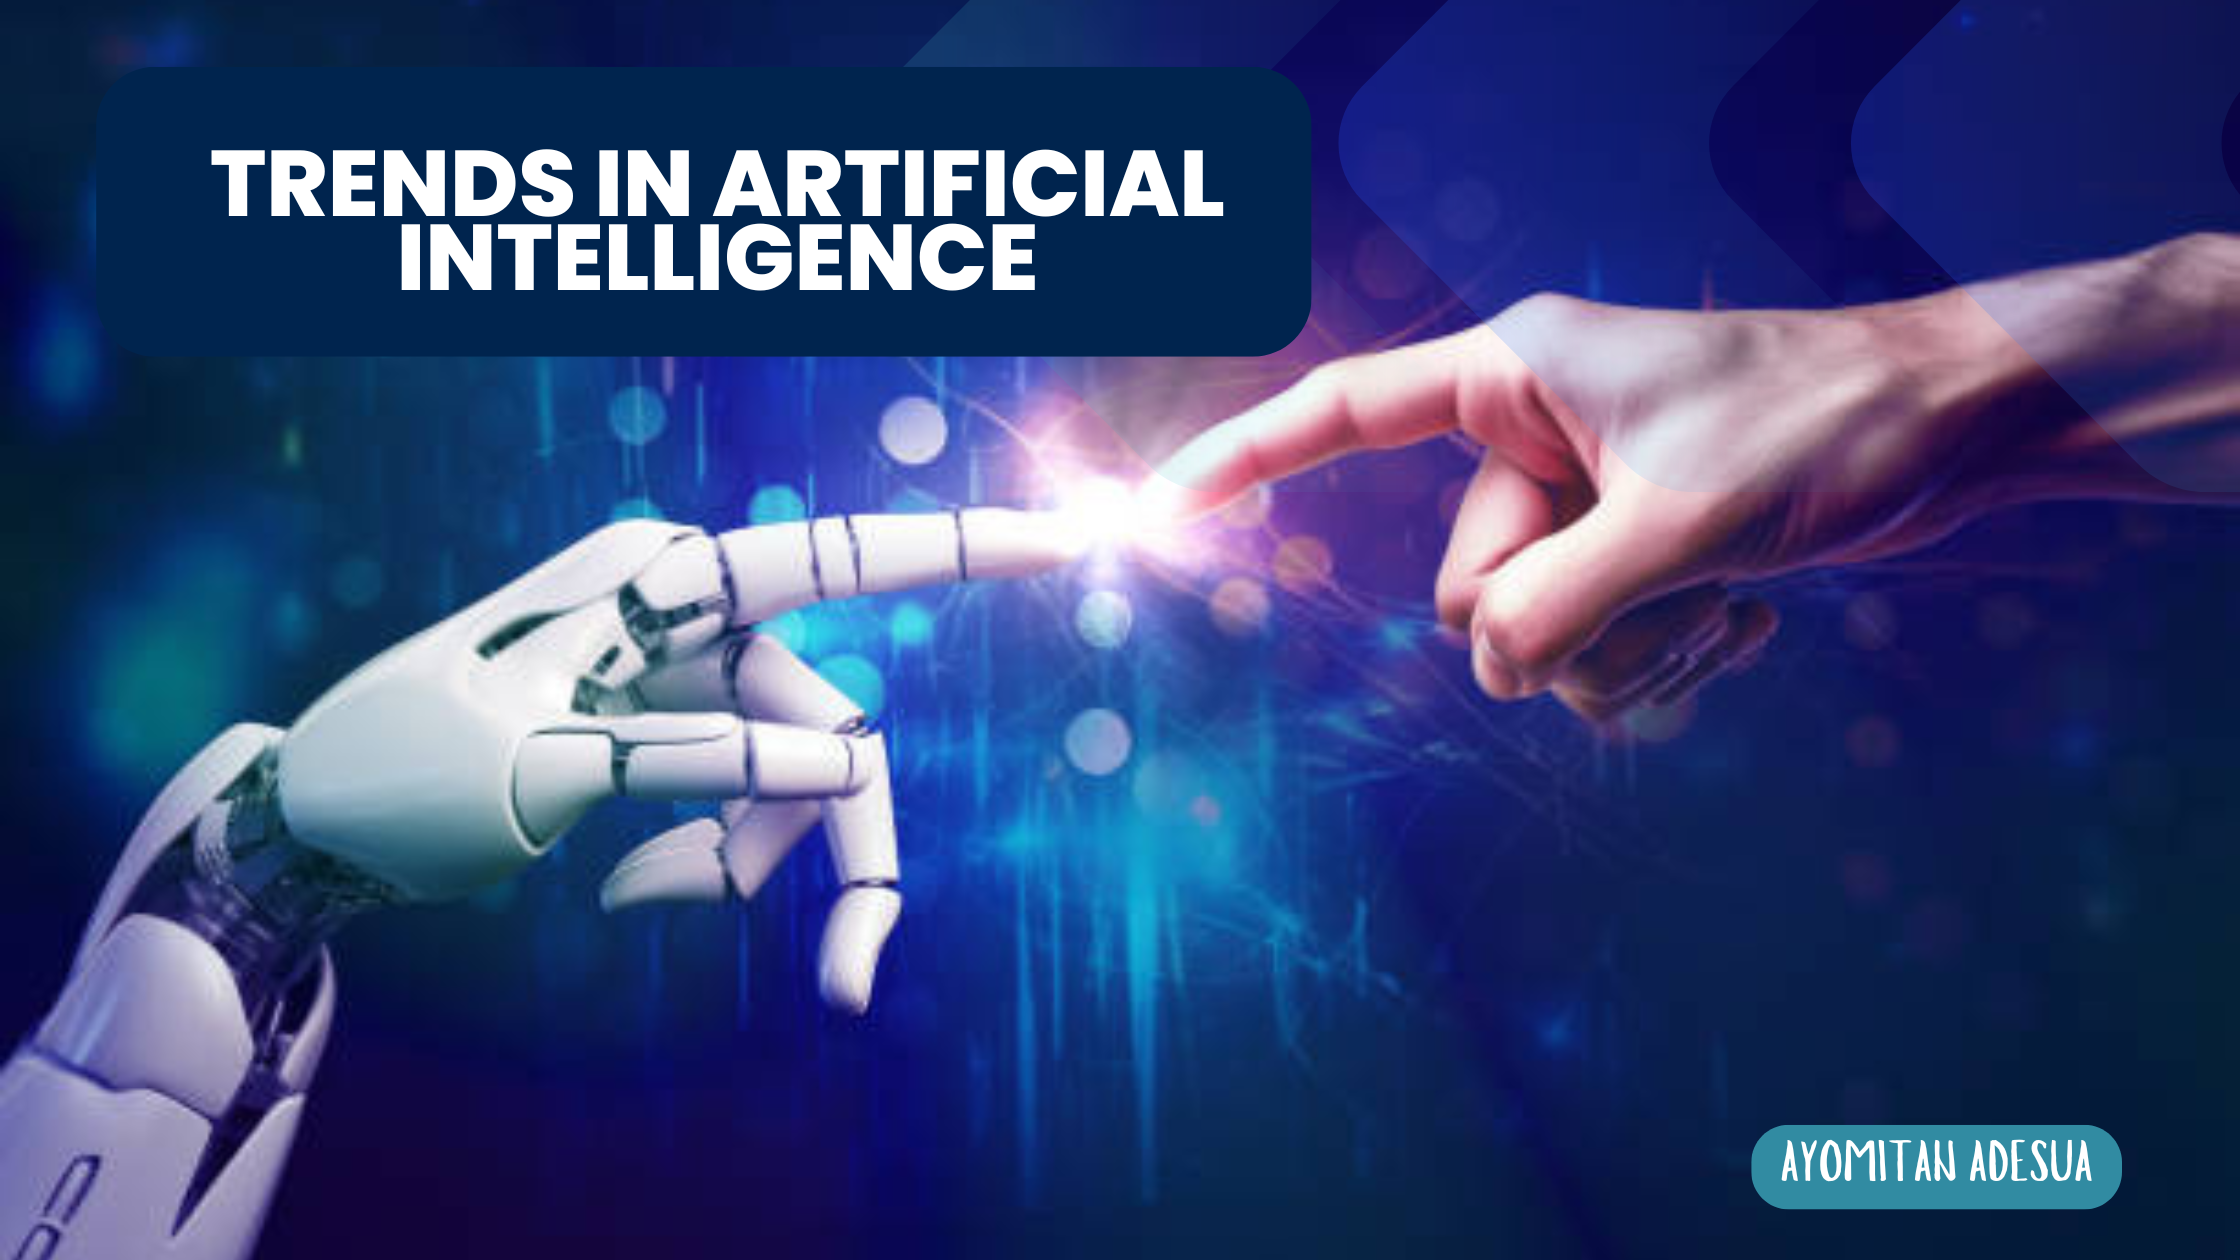

__Introduction__

The data set for this project includes abstracts of research papers scraped from the arXiv website in artificial intelligence, machine learning, and data science domains. The goal of this project is to find out the main trends in AI research by analyzing the contents of these abstracts. As AI technologies are progressing at a very fast pace, it is important to monitor new trends and ongoing research topics to identify the current state and future trends of the development.

__Objective__
The primary objective of this project is to try to use Topic Modeling by applying Non-Negative Matrix Factorization (NMF) to identify the main trends in AI research. From the abstracts of research papers, the important subfields and the new and hot topics of discussion will be identified.

__Questions__

1. What are the emerging topics and trends in AI research?
2. Which subfields are gaining traction (e.g., NLP, reinforcement learning, computer vision)?

__Methods__

To make sense of the research paper abstracts, the text mining process was performed using Non-Negative Matrix Factorization (NMF), which is an unsupervised learning technique that seeks to discover hidden topics in a set of documents. Before applying NMF, the text data was preprocessed and converted into TF-IDF matrix to represent the significance of the words in the documents. This matrix is then used as the input to NMF in order to obtain the latent topics which are encoded in the respective non-negative factors that represent the main topics in the research papers.

__Key steps__

1. Scraping the research paper abstracts from arXiv.
2. The first step of preparing the input data for the analysis – text cleaning and preprocessing.
3. Creating a TF-IDF matrix.
4. To dentify 10 topics, I have used NMF.
5. The interpretation of the themes by analyzing the top words within each topic.

__Results__

The NMF algorithm extracted 10 significant topics with regards to the findings of the AI research papers. Every topic is described by the top 10 words that refer to the concepts mentioned in the abstracts related to this topic. Below is a summary of the topics and their corresponding themes:

1. __Reinforcement Learning (RL) and Optimization:__ Focuses on RL, optimization problems, and reward-based learning algorithms.

2. __Large Language Models (LLMs) and Reasoning:__ Discusses large language models (LLMs), knowledge tasks, and dataset generation.

3. __Image Features and Visual Information:__ Relates to image processing, feature extraction, and semantic information analysis.

4. __3D Reconstruction and Diffusion Models:__ Involves 3D scene reconstruction and diffusion-based generation methods.

5. __Object and Anomaly Detection:__ Examines object detection, anomaly detection, and performance evaluation in detection algorithms.

6. __Graph Neural Networks (GNNs):__ Discusses graph structures, node relationships, and graph-based learning models.

7. __Federated Learning (FL):__ Focuses on federated learning, model training across datasets, and performance metrics in FL systems.

8. __Medical Imaging and Segmentation:__ Covers automated image segmentation, especially in medical contexts like cancer diagnosis and MRI.

9. __AI Systems and Human Interaction:__ Explores AI systems, human-AI interaction, and research challenges in AI system design.

10. __Neural Networks and Deep Learning:__ Discusses deep learning models, training techniques, and accuracy improvements.

__Conclusion__

These extracted topics indicate the following four major directions in the AI research: reinforcement learning, large language models, federated learning, and medical imaging. In particular:

* Reinforcement learning is still an active area of research and development with emphasis on the improvement of the learning algorithms as well as reward-based problems..

* Large language models (LLMs), such as those used in natural language processing, have gained attention due to their reasoning and knowledge-handling capabilities.


* Federated learning reflects the growing importance of privacy-preserving AI models that train across decentralized datasets..

* Medical imaging and the algorithms used in segmentation are necessary for healthcare advancements, particularly in diagnostics.

In [1]:
# Importing all the necessary packages

import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [2]:
# Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('arxiv_ai_papers.csv')
df.head()

,title,abstract,published
0,"The unknotting number, hard unknot diagrams, a...",We have developed a reinforcement learning age...,2024-09-13 17:59:52+00:00
1,"Agents in Software Engineering: Survey, Landsc...","In recent years, Large Language Models (LLMs) ...",2024-09-13 17:55:58+00:00
2,Towards Leveraging Contrastively Pretrained Ne...,Music recommender systems frequently utilize n...,2024-09-13 17:53:06+00:00
3,INN-PAR: Invertible Neural Network for PPG to ...,Non-invasive and continuous blood pressure (BP...,2024-09-13 17:48:48+00:00
4,An Efficient and Streaming Audio Visual Active...,This paper delves into the challenging task of...,2024-09-13 17:45:53+00:00


#### 1. Data Cleaning

In [4]:
# Defining a function to clean the text (remove punctuation, lowercase, and remove stopwords)
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text and remove stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Join the cleaned words back into a single string
    return " ".join(words)

# Apply the cleaning function to the abstracts
df['cleaned_abstract'] = df['abstract'].apply(clean_text)

# View the cleaned text
df[['title', 'cleaned_abstract']].head()

,title,cleaned_abstract
0,"The unknotting number, hard unknot diagrams, a...",developed reinforcement learning agent often f...
1,"Agents in Software Engineering: Survey, Landsc...",recent years large language models llms achiev...
2,Towards Leveraging Contrastively Pretrained Ne...,music recommender systems frequently utilize n...
3,INN-PAR: Invertible Neural Network for PPG to ...,noninvasive continuous blood pressure bp monit...
4,An Efficient and Streaming Audio Visual Active...,paper delves challenging task active speaker d...


#### 2. TF-IDF Vectorization

In [5]:
# Vectorize the cleaned abstracts using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_abstract'])

# Converting the TF-IDF matrix to a DataFrame for easy exploration
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Preview the TF-IDF matrix
tfidf_df.head()


,2d,3d,abilities,ability,able,access,accuracy,accurate,accurately,achieve,...,weather,weight,weights,wide,widely,work,works,world,years,zeroshot
0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.104936,0.0,0.215496,0.0,0.120505,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.085038,0.0,0.0000,0.064582,0.084266,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0822,0.045338,0.000000,0.0,0.060069,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.074081,0.0,0.000000,0.0


#### 3. Applying NMF

In [6]:
from sklearn.decomposition import NMF

# Setting the number of topics to 10
n_topics = 10

# Apply NMF to the TF-IDF matrix
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X)

# Get the topic-word matrix
topic_word_matrix = nmf_model.components_

# Get the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top 10 words for each topic
no_top_words = 10
tfidf_feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names, no_top_words)


Topic 0:
learning algorithm problems optimization problem rl reward reinforcement function optimal
Topic 1:
llms knowledge language models large tasks llm reasoning dataset generation
Topic 2:
image features images feature information visual quality module methods semantic
Topic 3:
3d diffusion generation video gaussian reconstruction scene multiview method object
Topic 4:
detection anomaly dataset object detectors evaluation performance traffic objects algorithms
Topic 5:
graph nodes graphs node information gnns structural networks online structures
Topic 6:
data training model models learning datasets federated trained performance fl
Topic 7:
segmentation medical automated manual models cancer model mri imaging diagnosis
Topic 8:
ai systems research challenges human potential models study agents analysis
Topic 9:
neural network networks deep model training depth accuracy noise efficiency


In [7]:
# Get the topic distribution for each document
topic_distribution = nmf_model.transform(X)

# Assign the dominant topic to each document
df['dominant_topic'] = topic_distribution.argmax(axis=1)

# Preview the dataset with the dominant topic for each paper
df[['title', 'dominant_topic']].head()


,title,dominant_topic
0,"The unknotting number, hard unknot diagrams, a...",0
1,"Agents in Software Engineering: Survey, Landsc...",1
2,Towards Leveraging Contrastively Pretrained Ne...,8
3,INN-PAR: Invertible Neural Network for PPG to ...,9
4,An Efficient and Streaming Audio Visual Active...,8


#### 4. Visualizing the Topics

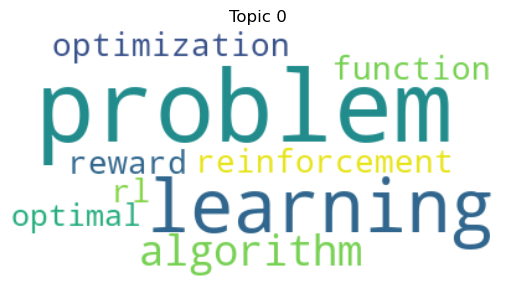

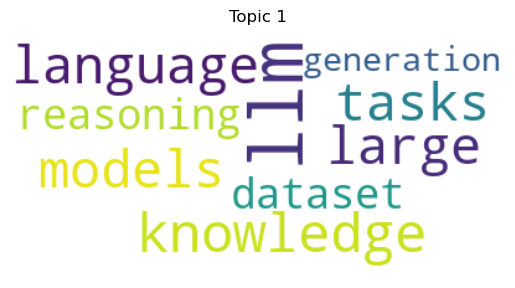

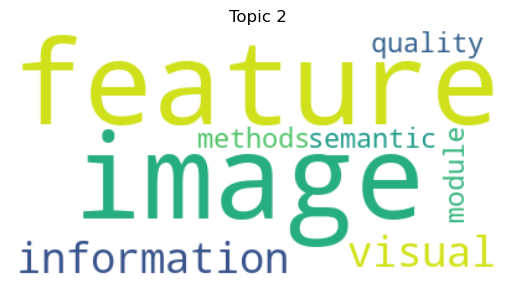

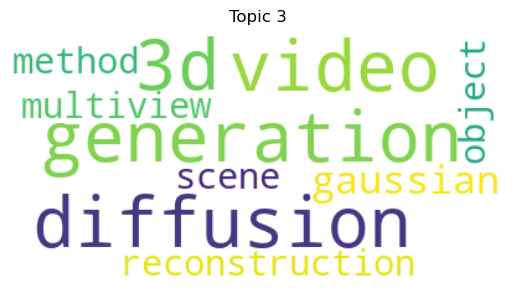

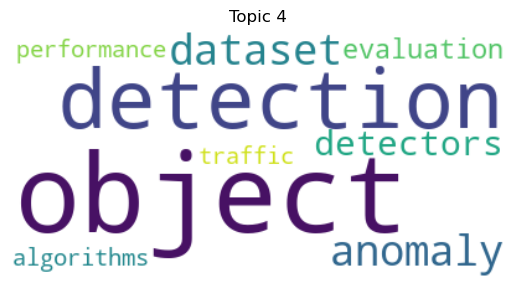

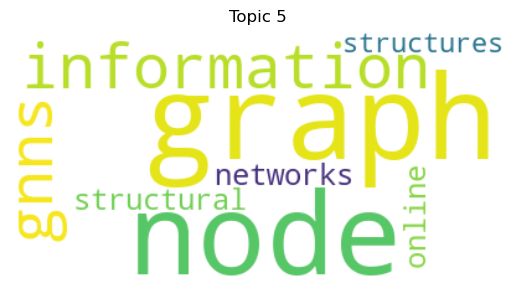

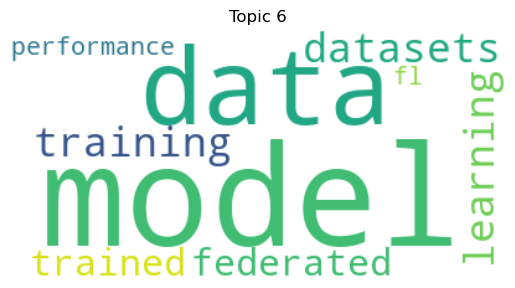

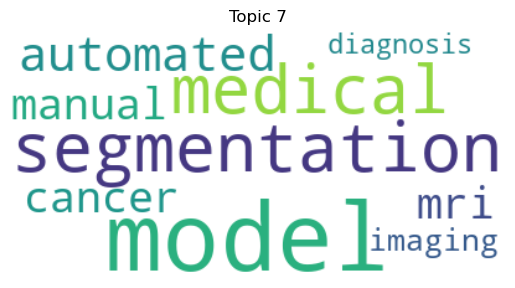

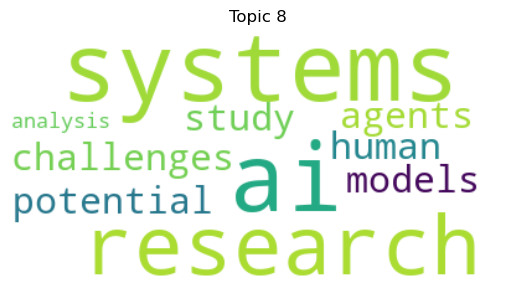

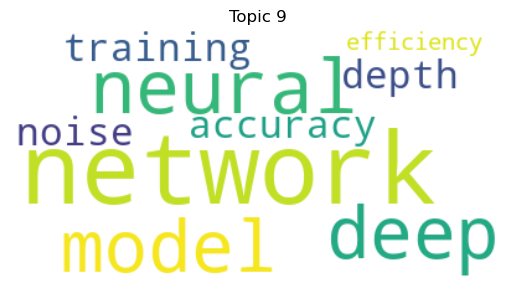

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each topic
def plot_wordclouds(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(background_color='white').generate(
            " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Plot word clouds for each topic
plot_wordclouds(nmf_model, tfidf_feature_names, no_top_words)


#### Interpreation of the topics

__Topic 0: Reinforcement Learning (RL) and Optimization__
Focuses on reinforcement learning, optimization algorithms, and reward functions in RL settings.

__Topic 1: Large Language Models (LLMs) and Reasoning__
Discusses large language models (LLMs), reasoning tasks, dataset generation, and knowledge in LLMs.

__Topic 2: Image Features and Visual Information__
Relates to image processing, feature extraction, visual quality, and semantic information.

__Topic 3: 3D Reconstruction and Diffusion Models__
Focuses on 3D scene reconstruction, diffusion models, and multiview generation methods.

__Topic 4: Object Detection and Anomaly Detection__
Involves object detection, anomaly detection, traffic detection, and performance evaluation of detection algorithms.

__Topic 5: Graph Neural Networks (GNNs)__
Discusses graph structures, nodes, GNNs, and structural network information.

__Topic 6: Federated Learning (FL)__
Focuses on federated learning, model training, datasets, and performance in federated settings.

__Topic 7: Medical Imaging and Segmentation__
Covers medical image segmentation, automated/manual models, MRI, cancer diagnosis, and imaging techniques.

__Topic 8: AI Systems and Human Interaction__
Explores AI systems, human-AI interaction, challenges in AI research, and potential applications.

__Topic 9: Neural Networks and Deep Learning__
Focuses on neural networks, deep learning models, training efficiency, and accuracy improvements.

__Summary__

This project has successfully identified 10 significant themes in AI research from arXiv abstracts. These themes focus on the key directions of development, such as deep learning; reinforcement learning; and medical image analysis, as well as the new promising directions such as federated learning and 3D reconstruction. By applying NMF, I have been able to uncover these hidden topics and thus gain an understanding on how the research on AI is progressing.

__Future Trends__

* __Federated Learning:__ With increasing awareness of privacy, federated learning is gaining more importance and, particularly, in such fields as healthcare and finance. This trend is expected to grow as federated architectures get enhanced.

* __Large Language Models:__ With the recent advancements in natural language processing, large language models (LLMs) are taking the center stage. These models are still under development, but they are slowly finding their way into reasoning, knowledge extraction and generative tasks.

* Graph Neural Networks (GNNs): GNNs are gaining traction as a powerful tool for analyzing graph-structured data, such as social networks and molecular structures. This area is expected to see rapid growth, especially in fields like drug discovery and recommendation systems.

* AI for Healthcare: The intersection of AI and healthcare remains a key focus area, especially with advancements in medical image processing, diagnostic tools, and personalized medicine. There are high chances that the use of AI in healthcare will further increase in the future due to the advancement in deep learning, federated learning, and real-time data processing.


__Emerging Areas__

* AI Systems and Human Interaction: This is where designing Human Centric AI systems will be important as the use of AI becomes more integrated in our systems. A trend to be observed in the future is the increased research on human-AI interaction to improve the AI systems’ transparency, naturalness, and moral compliance.

* 3D Reconstruction and Diffusion Models: Due to the development of virtual and augmented reality, 3D reconstruction models are relevant for generating videos, simulations, and virtual reality experiences.

__Conclusion__
The project has provided a comprehensive overview of research in AI. By identifying emerging trends, such as federated learning and large language models, and recognizing well-established areas like deep learning and medical imaging, this project serves as a valuable resource for understanding the current state of AI research and anticipating future directions.
